In [1]:
# Import the must required librarires....

import pandas as pd
import numpy as np

# import libraries for visuallization of the data....
import seaborn as sns
import matplotlib.pyplot as plt

# import library for statistical analysis....
import scipy.stats as stats
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

# for splitting the data...
from sklearn.model_selection import train_test_split

# import librarires for modelling purpose...
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# import libraries for model eavaluation....
from sklearn.metrics import roc_auc_score,precision_score,classification_report,recall_score,accuracy_score

# import the warnings library for ignoring warnings by that notebook does not look like dense filled..
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('booking.csv')

In [3]:
data.shape

(36285, 17)

In [4]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [6]:
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [7]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [8]:
nums = ['number of adults', 'number of children',\
 'number of weekend nights', 'number of week nights',\
 'lead time','average price', 'special requests']
cats = ['number of adults', 'number of children',\
        'type of meal','car parking space','room type','market segment type',
 'repeated','P-C','P-not-C','date of reservation','booking status']

## Univariate Analysis:

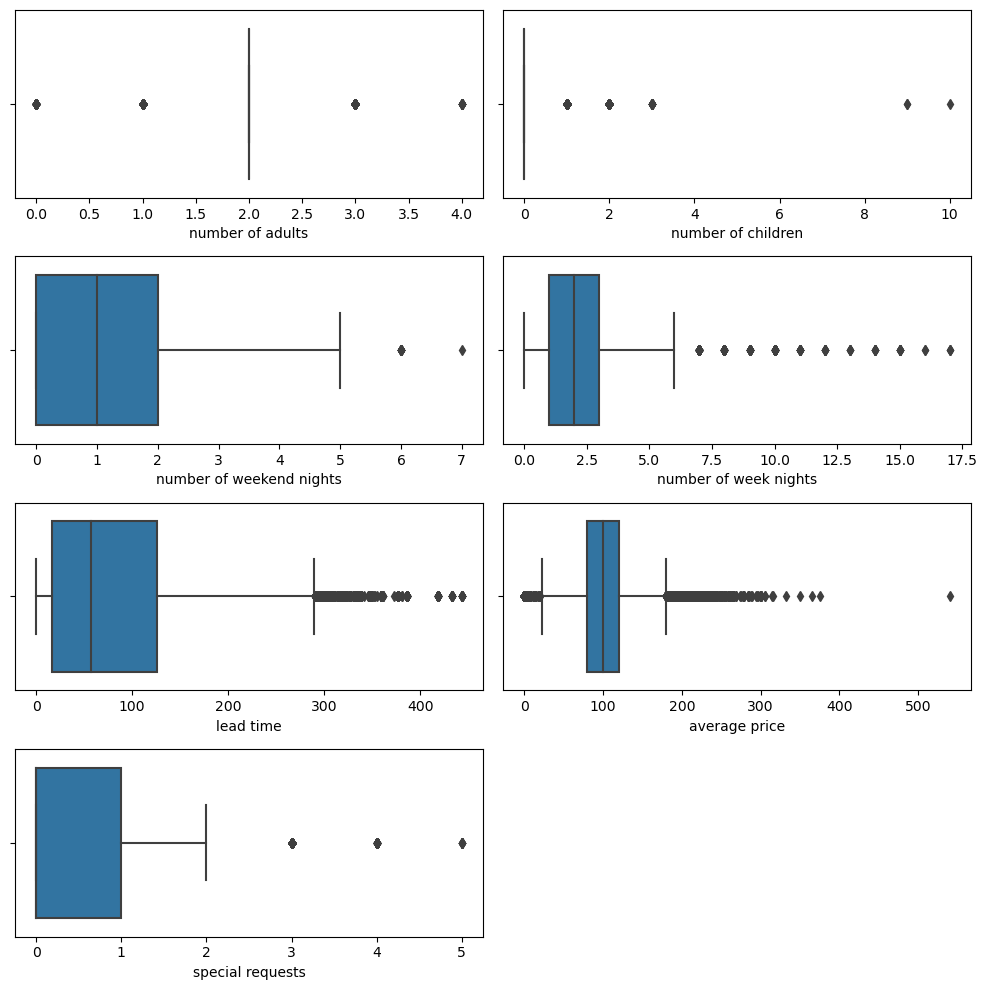

In [10]:
t = 1
plt.figure(figsize=(10,10))
for i in nums:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

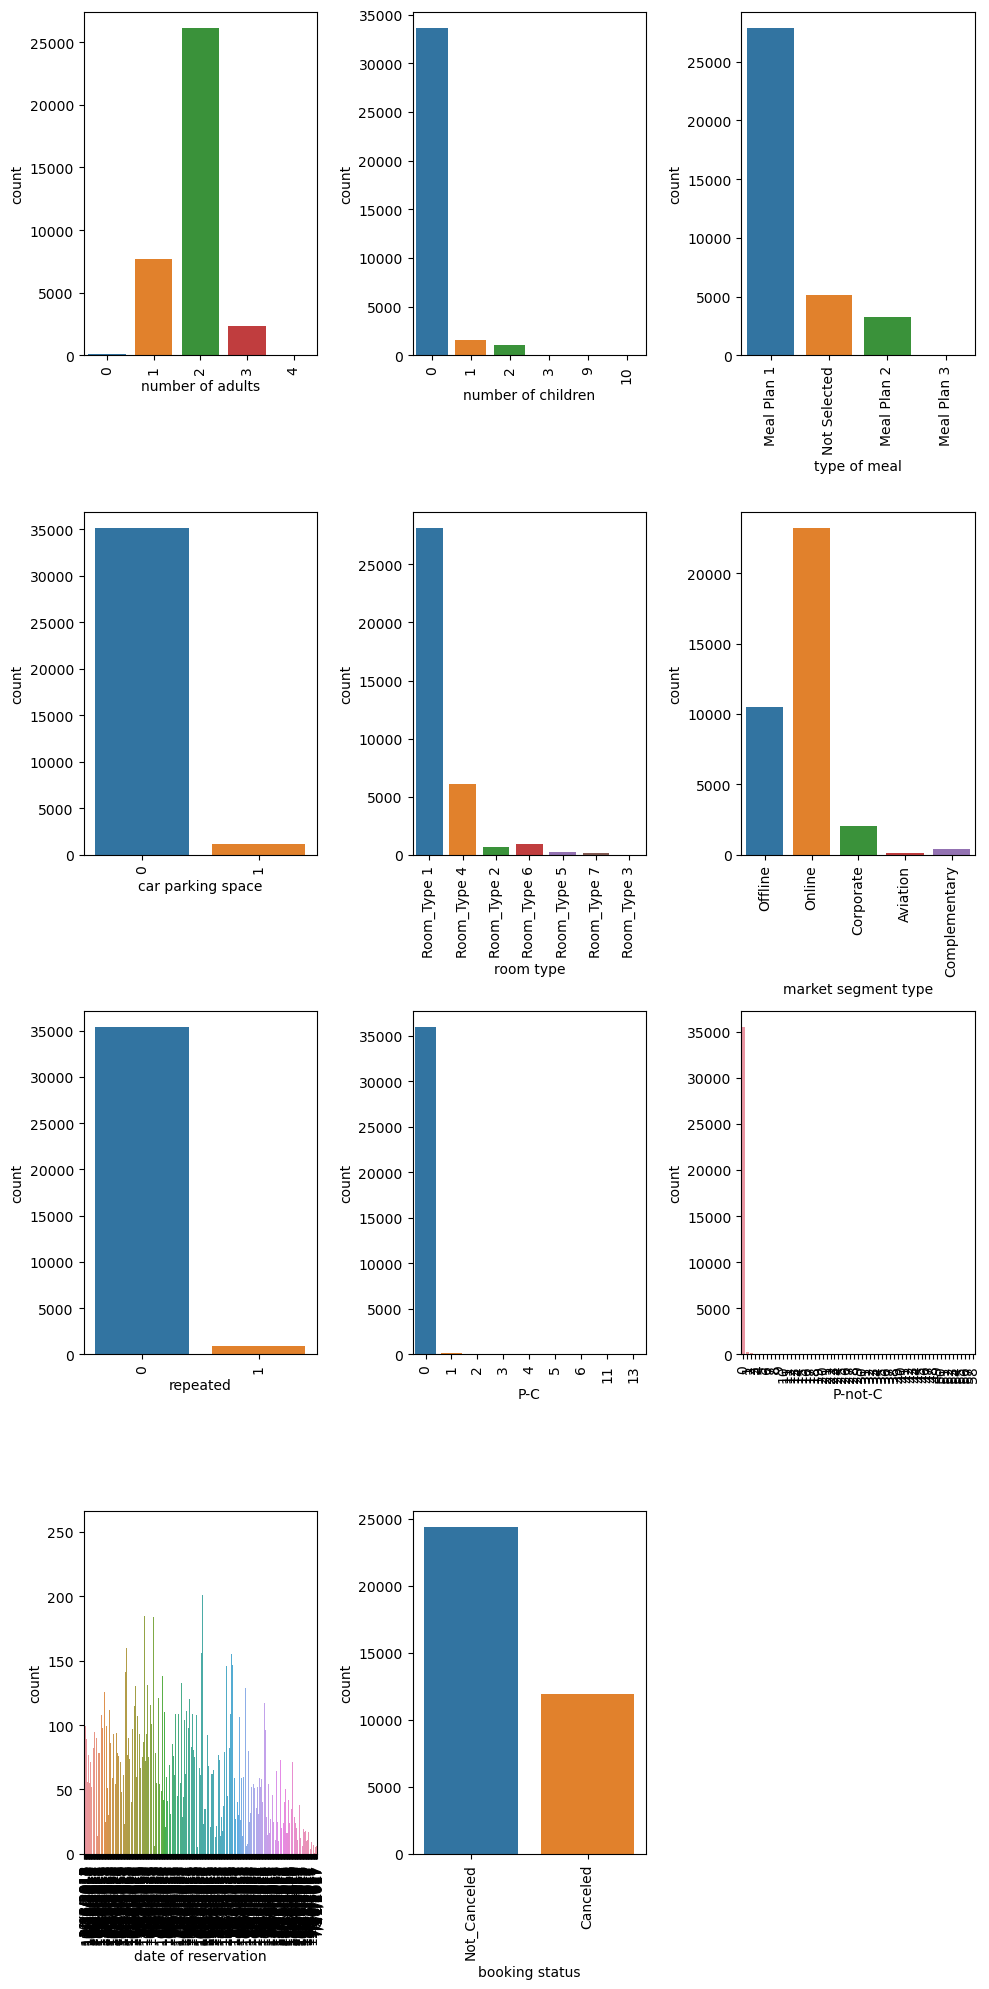

In [11]:
t = 1
plt.figure(figsize=(10,20))
for i in cats:
    plt.subplot(4,3,t)
    sns.countplot(x=data[i])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

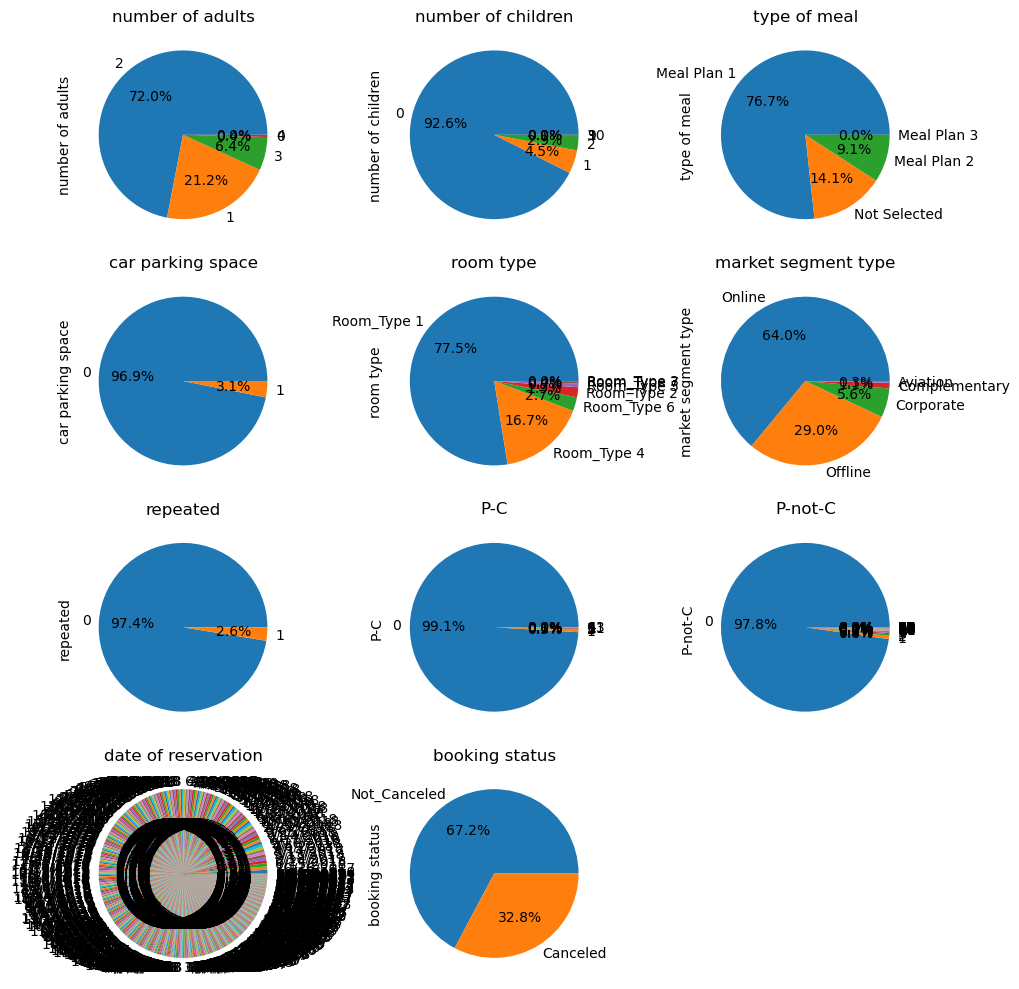

In [14]:
t = 1
plt.figure(figsize=(10,10))
for i in cats:
    plt.subplot(4,3,t)
    data[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [15]:
for i in cats:
    print(data[i].value_counts())
    print('----------------------------')

2    26110
1     7702
3     2318
0      139
4       16
Name: number of adults, dtype: int64
----------------------------
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: number of children, dtype: int64
----------------------------
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: type of meal, dtype: int64
----------------------------
0    35161
1     1124
Name: car parking space, dtype: int64
----------------------------
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64
----------------------------
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: market segment type, dtype: int64
----------------------------
0    35355
1      930
Name: repeated, dtype: int64
----------------------------
0     35947
1       198
2     

## Bivariate Analysis:

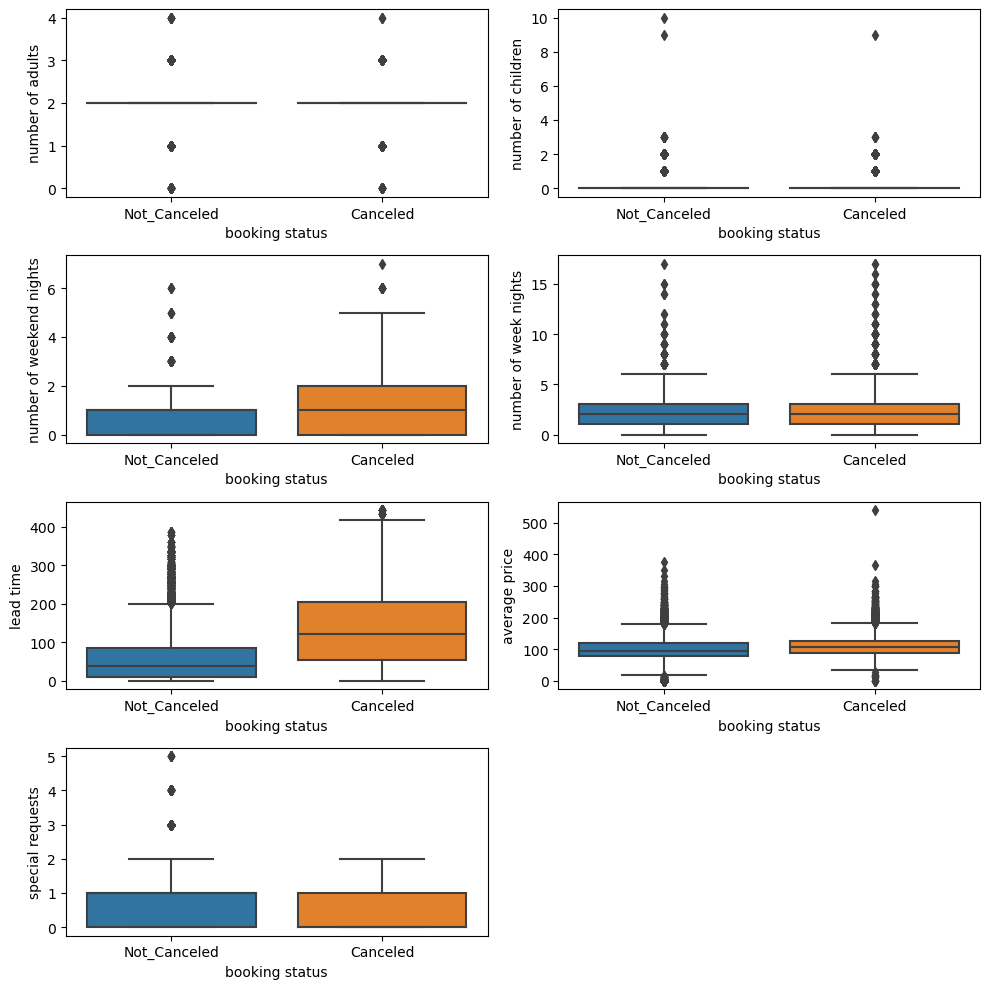

In [17]:
t = 1
plt.figure(figsize=(10,10))
for i in nums:
    plt.subplot(4,2,t)
    sns.boxplot(y=data[i],x=data['booking status'])
    t+=1
plt.tight_layout()
plt.show()

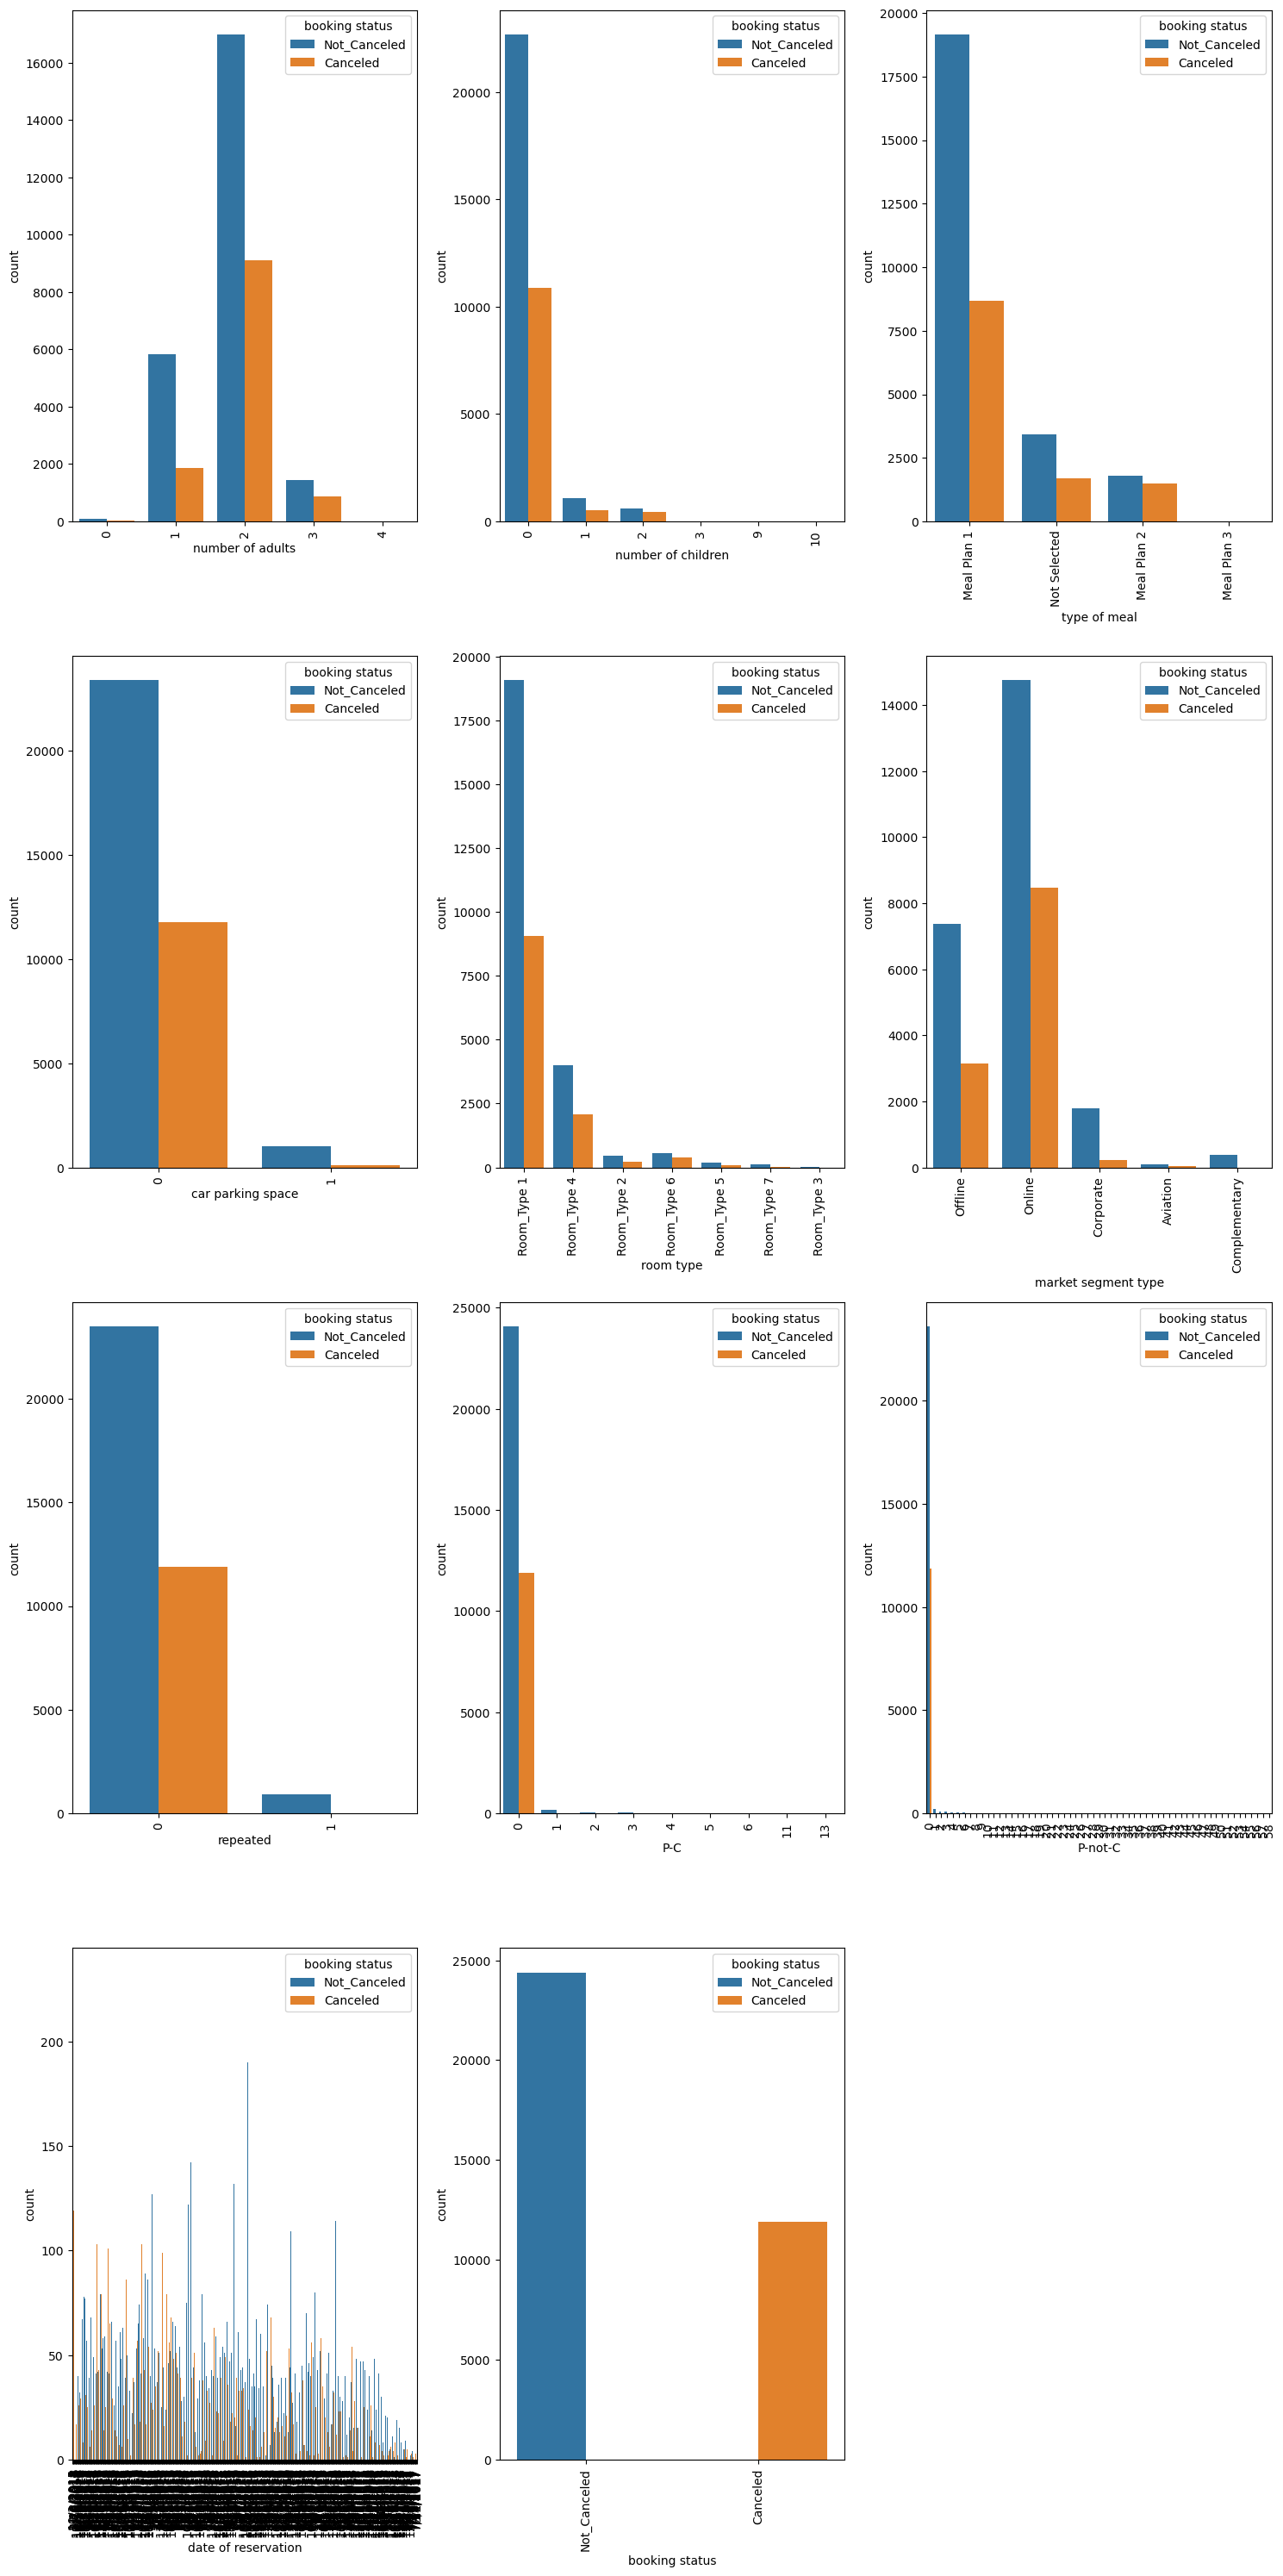

In [18]:
t = 1
plt.figure(figsize=(15,30))
for i in cats:
    plt.subplot(4,3,t)
    sns.countplot(x=data[i],hue=data['booking status'])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

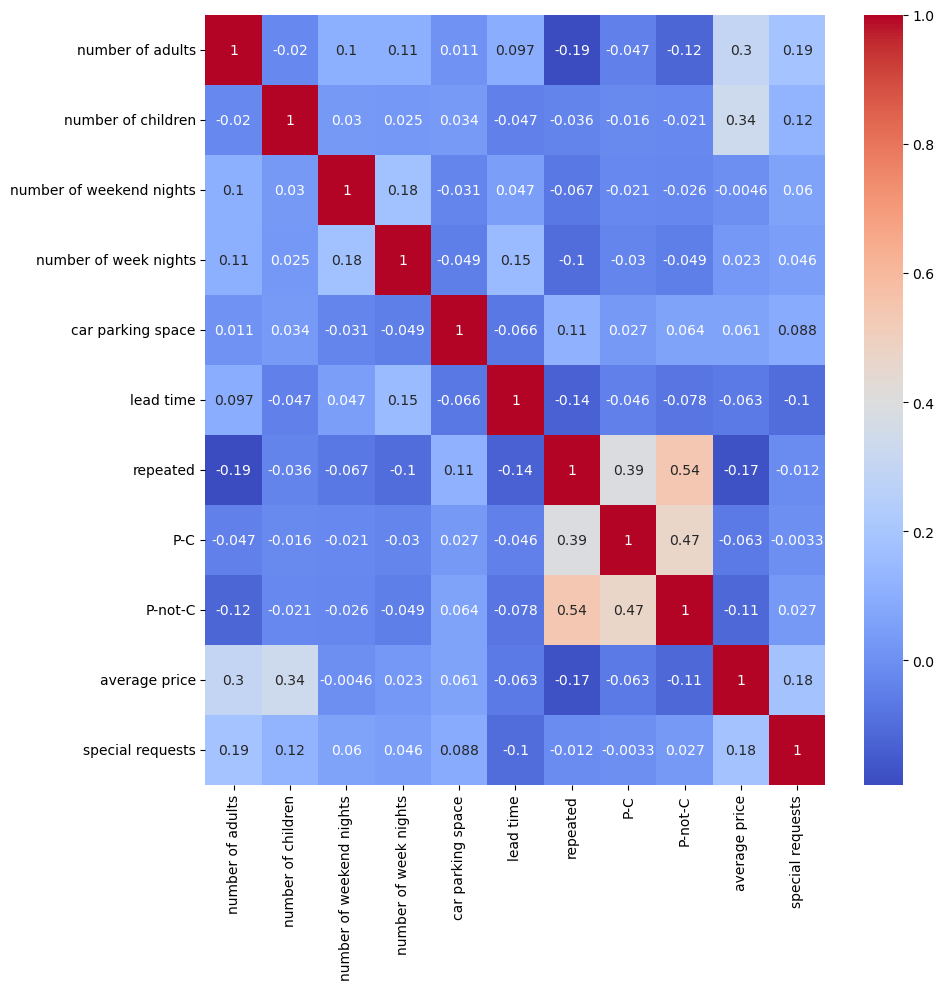

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');

### Missing Values:

In [20]:
data.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

## Feature Engineering:

In [21]:
data['Total_guests'] = data['number of adults'] + data['number of children']


In [22]:
data['Total_nights'] = data['number of weekend nights'] + data['number of week nights']


In [23]:
from datetime import datetime
data['date of reservation_n'] = pd.to_datetime(data['date of reservation'],format='%m/%d/%Y', errors='coerce')


In [24]:
data['date of reservation_n'].fillna(pd.to_datetime('2/28/2018',format='%m/%d/%Y').normalize(),inplace=True)

In [25]:
data['Reservation_LeadTime'] = (data['date of reservation_n'] - data['date of reservation_n'].min()).dt.days

In [26]:
data['reservation_month'] = data['date of reservation_n'].dt.month
data['reservation_day_of_week'] = data['date of reservation_n'].dt.dayofweek

In [27]:
data['Avg_Price_per_Guest'] = data['average price'] / (data['Total_guests'] + 1)  # Avoid division by zero


In [28]:
data['Nights_per_Price'] = data['Total_nights'] / (data['average price'] + 1)


In [29]:
bins = [0, 17, 85, 126, 443]
labels = ['Short', 'Medium', 'Long', 'Very Long']

data['lead_time_bin'] = pd.cut(data['lead time'], bins=bins, labels=labels,include_lowest=True)


In [30]:
data['total_price'] = data['average price'] * (data['number of weekend nights'] + data['number of week nights'])


In [31]:
data['family_booking'] = (data['number of children'] > 0).astype(int)


In [32]:
data['group_booking'] = (data['Total_guests'] >= 4).astype(int)


In [33]:
data['is_weekend'] = data['date of reservation_n'].dt.dayofweek.isin([5, 6])

In [34]:
data['is_weekend'] = data['is_weekend'].astype(int)


In [35]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,Reservation_LeadTime,reservation_month,reservation_day_of_week,Avg_Price_per_Guest,Nights_per_Price,lead_time_bin,total_price,family_booking,group_booking,is_weekend
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,10,4,29.333333,0.078652,Very Long,616.00,1,0,0
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,1131,11,1,53.340000,0.037147,Short,426.72,0,0,0
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,880,2,2,12.500000,0.078431,Short,200.00,1,0,0
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,596,5,5,50.000000,0.019802,Very Long,200.00,0,0,1
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,922,4,2,38.500000,0.038462,Medium,231.00,0,0,0


In [36]:
data_new = data.drop(columns=['Booking_ID','date of reservation','date of reservation_n'])

In [37]:
pd.set_option('display.max_columns',50)

In [38]:
data_new['market segment type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [39]:
data_new.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,Total_guests,Total_nights,Reservation_LeadTime,reservation_month,reservation_day_of_week,Avg_Price_per_Guest,Nights_per_Price,lead_time_bin,total_price,family_booking,group_booking,is_weekend
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2,7,0,10,4,29.333333,0.078652,Very Long,616.00,1,0,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1,4,1131,11,1,53.340000,0.037147,Short,426.72,0,0,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3,4,880,2,2,12.500000,0.078431,Short,200.00,1,0,0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1,2,596,5,5,50.000000,0.019802,Very Long,200.00,0,0,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1,3,922,4,2,38.500000,0.038462,Medium,231.00,0,0,0


In [40]:
data_new['booking status'] = data_new['booking status'].map({'Not_Canceled':0, 'Canceled':1})

## Statistical Tests:

In [41]:
data_new.shape

(36285, 27)

In [42]:
data_new.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'booking status',
       'Total_guests', 'Total_nights', 'Reservation_LeadTime',
       'reservation_month', 'reservation_day_of_week', 'Avg_Price_per_Guest',
       'Nights_per_Price', 'lead_time_bin', 'total_price', 'family_booking',
       'group_booking', 'is_weekend'],
      dtype='object')

In [43]:
nums = ['lead time','average price','Total_guests', 'Total_nights', 'Reservation_LeadTime',\
 'Avg_Price_per_Guest','Nights_per_Price','total_price']
cats = ['type of meal', 'car parking space', 'room type', 'market segment type', 'repeated', 'P-C',\
        'P-not-C', 'booking status', 'Total_guests', 'Total_nights', 'Reservation_LeadTime',\
        'reservation_month', 'reservation_day_of_week', 'Avg_Price_per_Guest', 'Nights_per_Price',\
        'lead_time_bin', 'total_price', 'family_booking', 'group_booking', 'is_weekend']


In [44]:
for i in nums:
    pval = stats.shapiro(data_new[i])[1]
    if pval>0.05:
        print(f'pval for {i} is {pval} hence Ho: Data is Normal')
    else:
        print(f'pval for {i} is {pval} hence Ha: Data is not Normal')

pval for lead time is 0.0 hence Ha: Data is not Normal
pval for average price is 0.0 hence Ha: Data is not Normal
pval for Total_guests is 0.0 hence Ha: Data is not Normal
pval for Total_nights is 0.0 hence Ha: Data is not Normal
pval for Reservation_LeadTime is 0.0 hence Ha: Data is not Normal
pval for Avg_Price_per_Guest is 0.0 hence Ha: Data is not Normal
pval for Nights_per_Price is 0.0 hence Ha: Data is not Normal
pval for total_price is 0.0 hence Ha: Data is not Normal


In [45]:
for i in nums:
    p_value = stats.mannwhitneyu(data_new['booking status'],data_new[i])[1]
    print(f'p_value for {i} is {p_value}')

p_value for lead time is 0.0
p_value for average price is 0.0
p_value for Total_guests is 0.0
p_value for Total_nights is 0.0
p_value for Reservation_LeadTime is 0.0
p_value for Avg_Price_per_Guest is 0.0
p_value for Nights_per_Price is 0.0
p_value for total_price is 0.0


In [46]:
for i in cats:
    tbl = pd.crosstab(data_new[i],data_new['booking status'])
    pval = chi2_contingency(tbl)[1]
    print(f'pvalue for {i} is {pval}')

pvalue for type of meal is 3.4179336018719243e-60
pvalue for car parking space is 2.5011863529534376e-60
pvalue for room type is 1.6769123592416988e-10
pvalue for market segment type is 6.246509234218631e-175
pvalue for repeated is 1.6948486218139465e-92
pvalue for P-C is 3.326190719801652e-26
pvalue for P-not-C is 1.154753912182785e-49
pvalue for booking status is 0.0
pvalue for Total_guests is 1.920671617017406e-76
pvalue for Total_nights is 8.679761707312466e-132
pvalue for Reservation_LeadTime is 0.0
pvalue for reservation_month is 2.577762526376018e-296
pvalue for reservation_day_of_week is 2.814391877161057e-14
pvalue for Avg_Price_per_Guest is 0.0
pvalue for Nights_per_Price is 0.0
pvalue for lead_time_bin is 0.0
pvalue for total_price is 0.0
pvalue for family_booking is 4.785341461734892e-07
pvalue for group_booking is 2.7227810383790224e-12
pvalue for is_weekend is 1.657741228973719e-08


In [47]:
data_new['type of meal'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

## Feature Encoding:

In [48]:
data_new['type of meal'] = data_new['type of meal'].map({'Meal Plan 1':1, 'Not Selected':0, 'Meal Plan 2':2, 'Meal Plan 3':3})

In [49]:
data_new['room type'] = data_new['room type'].map({'Room_Type 1':0, 'Room_Type 4':3, 'Room_Type 2':1,\
                                                   'Room_Type 6':5,'Room_Type 5':4, 'Room_Type 7':6,\
                                                   'Room_Type 3':2})

### Split the data into train and test:

In [50]:
x = data_new.drop(columns='booking status')
x= pd.get_dummies(x,drop_first=True)
y = data_new['booking status']

In [51]:
trainx,testx,trainy,testy = train_test_split(x,y)

In [52]:
gbm = XGBClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6139
           1       0.85      0.80      0.83      2933

    accuracy                           0.89      9072
   macro avg       0.88      0.87      0.87      9072
weighted avg       0.89      0.89      0.89      9072



In [53]:
gbm = GradientBoostingClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6139
           1       0.81      0.71      0.76      2933

    accuracy                           0.85      9072
   macro avg       0.84      0.82      0.83      9072
weighted avg       0.85      0.85      0.85      9072



In [54]:
gbm = RandomForestClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6139
           1       0.88      0.81      0.84      2933

    accuracy                           0.90      9072
   macro avg       0.89      0.88      0.88      9072
weighted avg       0.90      0.90      0.90      9072



In [55]:
gbm = DecisionTreeClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6139
           1       0.79      0.81      0.80      2933

    accuracy                           0.87      9072
   macro avg       0.85      0.85      0.85      9072
weighted avg       0.87      0.87      0.87      9072



In [56]:
gbm = AdaBoostClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      6139
           1       0.73      0.68      0.71      2933

    accuracy                           0.82      9072
   macro avg       0.79      0.78      0.79      9072
weighted avg       0.81      0.82      0.81      9072



In [57]:
gbm = LogisticRegression()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      6139
           1       0.72      0.59      0.65      2933

    accuracy                           0.79      9072
   macro avg       0.77      0.74      0.75      9072
weighted avg       0.79      0.79      0.79      9072



In [58]:
gbm = KNeighborsClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6139
           1       0.73      0.63      0.67      2933

    accuracy                           0.80      9072
   macro avg       0.78      0.76      0.77      9072
weighted avg       0.80      0.80      0.80      9072



In [59]:
gbm = GaussianNB()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.14      0.24      6139
           1       0.35      0.97      0.51      2933

    accuracy                           0.40      9072
   macro avg       0.62      0.55      0.37      9072
weighted avg       0.72      0.40      0.32      9072



In [60]:
# base model
def base_models():
    models = dict()
    models['LR'] = LogisticRegression()
    models['DTREE'] = DecisionTreeClassifier()
    models['RF'] = RandomForestClassifier()
    models['GBM'] = GradientBoostingClassifier()
    models['XGB'] = XGBClassifier()
    models['ADA'] = AdaBoostClassifier()
    return models

In [61]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import log_loss,make_scorer

def eval_models(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model, X = trainx,y = trainy,cv=cv,scoring='accuracy',
                            n_jobs=-1)
    return scores

In [62]:
models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean(result))

LR 0.7957958335097295
DTREE 0.8295848938074137
RF 0.8516515564543833
GBM 0.8526436974739984
XGB 0.8600666072354681
ADA 0.8536480945184273


In [63]:
from sklearn.ensemble import StackingClassifier

GBM = GradientBoostingClassifier()
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
RF = RandomForestClassifier()

base_estimators = [('XGB',XGB),('ADA',ADA)]
stack = StackingClassifier(estimators = base_estimators,final_estimator=GBM,cv=5)

stack.fit(trainx,trainy)
pred = stack.predict(testx)
print(classification_report(testy,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6139
           1       0.85      0.80      0.82      2933

    accuracy                           0.89      9072
   macro avg       0.88      0.86      0.87      9072
weighted avg       0.89      0.89      0.89      9072



In [64]:
gbm = XGBClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(trainx)
print(classification_report(trainy,pred_gbm))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     18257
           1       0.92      0.86      0.89      8956

    accuracy                           0.93     27213
   macro avg       0.93      0.91      0.92     27213
weighted avg       0.93      0.93      0.93     27213



In [65]:
gbm = XGBClassifier()
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6139
           1       0.85      0.80      0.83      2933

    accuracy                           0.89      9072
   macro avg       0.88      0.87      0.87      9072
weighted avg       0.89      0.89      0.89      9072



In [78]:
gbm = XGBClassifier(n_estimator=100,max_depth=9)
gbm.fit(trainx,trainy)
pred_gbm = gbm.predict(testx)
print(classification_report(testy,pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6139
           1       0.85      0.82      0.84      2933

    accuracy                           0.90      9072
   macro avg       0.88      0.88      0.88      9072
weighted avg       0.89      0.90      0.90      9072



### Hence we got the maximum accuracy on the XGBclassifier 

# END.....